<a href="https://colab.research.google.com/github/IgorNowacki/car-price-prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the modules

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold

Data Collecting and Data Processing

In [94]:
# loading the data
dataset= pd.read_csv('/content/car data.csv')

#checking the shape of the dataset
print("The shape of dataset is:",dataset.shape)

# chceking the firs 5 rows of the car data frame
dataset.head()

The shape of dataset is: (301, 9)


Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

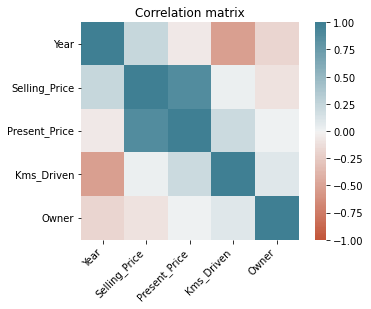

In [95]:
#get acquainted with data set
print(dataset.info())

#creating correlation matrix
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set(title='Correlation matrix')

# Describe the data
dataset.describe()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


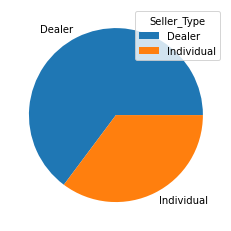

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


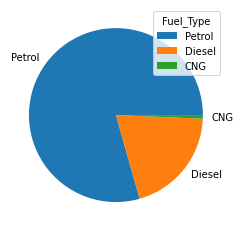

Manual       261
Automatic     40
Name: Transmission, dtype: int64


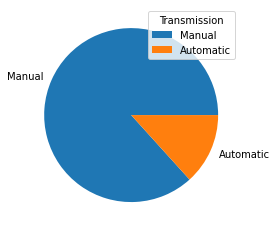

In [96]:
#checking the distribution of categorical columns
print(dataset.Seller_Type.value_counts())
plt.pie(dataset.Seller_Type.value_counts(),labels = dataset.Seller_Type.unique())
plt.legend(title = "Seller_Type")
plt.show()

print(dataset.Fuel_Type.value_counts())
plt.pie(dataset.Fuel_Type.value_counts(),labels = dataset.Fuel_Type.unique())
plt.legend(title = "Fuel_Type")
plt.show()

print(dataset.Transmission.value_counts())
plt.pie(dataset.Transmission.value_counts(),labels = dataset.Transmission.unique())
plt.legend(title = "Transmission")
plt.show()

In [97]:
#Encoding the category columns
dataset.replace({'Fuel_Type':{'Diesel':0,"Petrol":1,"CNG":2}},inplace=True)
dataset.replace({'Seller_Type':{'Dealer':0,"Individual":1}},inplace=True)
dataset.replace({'Transmission':{'Automatic':0,"Manual":1}},inplace=True)
dataset.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          1   
1      sx4  2013           4.75           9.54       43000          0   
2     ciaz  2017           7.25           9.85        6900          1   
3  wagon r  2011           2.85           4.15        5200          1   
4    swift  2014           4.60           6.87       42450          0   

   Seller_Type  Transmission  Owner  
0            0             1      0  
1            0             1      0  
2            0             1      0  
3            0             1      0  
4            0             1      0

In [98]:
#Splitting the data into training and test data

X=dataset.drop(['Car_Name',"Selling_Price"],axis=1)
Y=dataset["Selling_Price"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.15, random_state=3)

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("Y train: ",Y_train.shape)
print("Y test: ",Y_test.shape)

r_squared_train=[]
r_squared_test=[]
CV_score=[]


x train:  (255, 7)
x test:  (46, 7)
Y train:  (255,)
Y test:  (46,)


Linear Regression model

R squared Error for train data: 0.8897920011635849


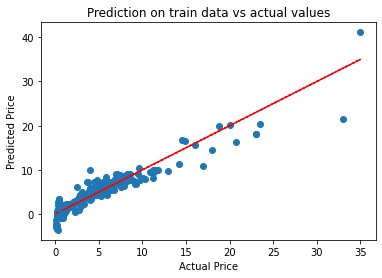

R squared Error for test data: 0.8349368627415763


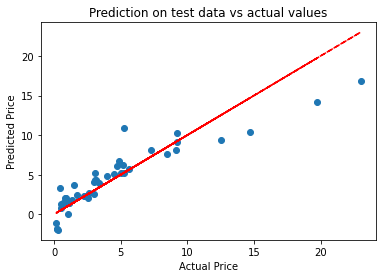

Train CV scores : [0.84812726 0.78268245 0.79758393 0.83635933 0.90227867]
Train CV mean : 0.83


In [99]:
# Training Linear Regression model
reg = LinearRegression()
reg.fit(X_train,Y_train)

#Linear Regression model Evaluation

  #Prediction on train data
prediction_on_train_data=reg.predict(X_train)
reg_error_score_train=metrics.r2_score(Y_train,prediction_on_train_data)
print("R squared Error for train data:",reg_error_score_train)
r_squared_train.append(round(reg_error_score_train,3))
plt.scatter(Y_train, prediction_on_train_data)
plt.plot(Y_train,Y_train, color='r', ls='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction on train data vs actual values")
plt.show()

  #Prediction on test data
prediction_on_test_data=reg.predict(X_test)
reg_error_score_test=metrics.r2_score(Y_test,prediction_on_test_data)
print("R squared Error for test data:",reg_error_score_test)
r_squared_test.append(round(reg_error_score_test,3))
plt.scatter(Y_test, prediction_on_test_data)
plt.plot(Y_test,Y_test, color='r', ls='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction on test data vs actual values")
plt.show()  

  #Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val = cross_val_score(reg ,X ,Y ,cv=kf)
cv_mean = cross_val.mean()
print("Train CV scores :",cross_val)
print("Train CV mean :",round(cv_mean,2))
CV_score.append(round(cv_mean,3))

Lasso Regression model

R squared Error for train data: 0.8897919871536247


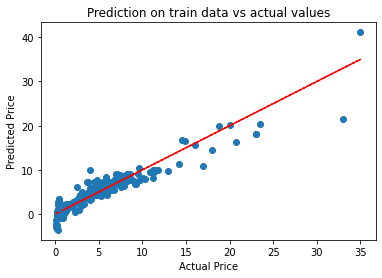

R squared Error for test data: 0.8349390381268865


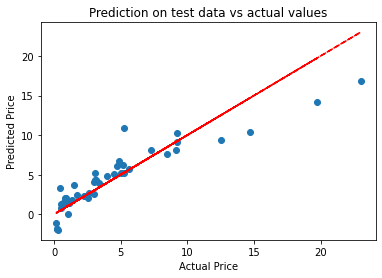

Train CV scores : [0.81415577 0.73627797 0.79822745 0.81916033 0.87674892]
Train CV mean : 0.81


In [100]:
# Training Lasso Regression model
lass = Lasso()
alpha=np.logspace(-4,4,num=14)
lass_rs = RandomizedSearchCV(estimator = lass, param_distributions = dict(alpha=alpha))
lass_rs.fit(X_train,Y_train)

#Linear Regression model Evaluation

  #Prediction on train data
prediction_on_train_data_lasso=lass_rs.predict(X_train)
error_score_training_lasso=metrics.r2_score(Y_train,prediction_on_train_data_lasso)
print("R squared Error for train data:",error_score_training_lasso)
r_squared_train.append(round(error_score_training_lasso,3))
plt.scatter(Y_train, prediction_on_train_data_lasso)
plt.plot(Y_train,Y_train, color='r', ls='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction on train data vs actual values")
plt.show()

  #Prediction on test data
prediction_on_test_data_lasso=lass_rs.predict(X_test)
error_score_test_lasso=metrics.r2_score(Y_test,prediction_on_test_data_lasso)
print("R squared Error for test data:",error_score_test_lasso)
r_squared_test.append(round(error_score_test_lasso,3))
plt.scatter(Y_test, prediction_on_test_data_lasso)
plt.plot(Y_test,Y_test, color='r', ls='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction on test data vs actual values")
plt.show()

  #Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val = cross_val_score(lass_rs ,X ,Y ,cv=kf)
cv_mean = cross_val.mean()
print("Train CV scores :",cross_val)
print("Train CV mean :",round(cv_mean,2))
CV_score.append(round(cv_mean,3))


Ridge regression model

R squared Error for train data: 0.8896611067190086


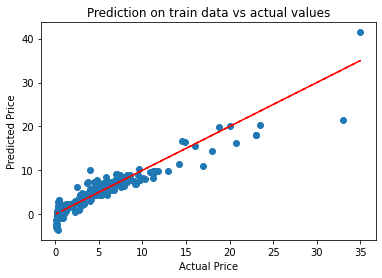

R squared Error for test data: 0.8349629714024994


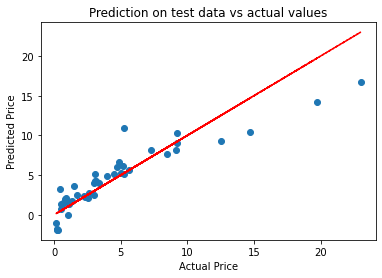

Train CV scores : [0.84594156 0.76600942 0.81669983 0.81566468 0.89869543]
Train CV mean : 0.83


In [101]:
# Training Ridge Regression model
ridge = Ridge()
alpha=np.logspace(-4,4,num=14)
ridge_rs = RandomizedSearchCV(estimator = ridge, param_distributions = dict(alpha=alpha))
ridge_rs.fit(X_train,Y_train)

#Ridge Regression model evaluation

  #Prediction on train data
prediction_on_train_data_ridge=ridge_rs.predict(X_train)
error_score_training_ridge=metrics.r2_score(Y_train,prediction_on_train_data_ridge)
print("R squared Error for train data:",error_score_training_ridge)
r_squared_train.append(round(error_score_training_ridge,3))
plt.scatter(Y_train, prediction_on_train_data_ridge)
plt.plot(Y_train,Y_train, color='r', ls='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction on train data vs actual values")
plt.show()

  #Prediction on test data
prediction_on_test_data_ridge=ridge_rs.predict(X_test)
error_score_test_ridge=metrics.r2_score(Y_test,prediction_on_test_data_ridge)
print("R squared Error for test data:",error_score_test_ridge)
r_squared_test.append(round(error_score_test_ridge,3))
plt.scatter(Y_test, prediction_on_test_data_ridge)
plt.plot(Y_test,Y_test, color='r', ls='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction on test data vs actual values")
plt.show()

  #Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val = cross_val_score(ridge_rs ,X ,Y ,cv=kf)
cv_mean = cross_val.mean()
print("Train CV scores :",cross_val)
print("Train CV mean :",round(cv_mean,2))
CV_score.append(round(cv_mean,3))

Random Forest

R squared Error for train data: 0.9817248442455643


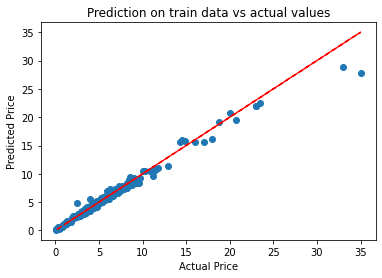

R squared Error for test data: 0.9489127167426004


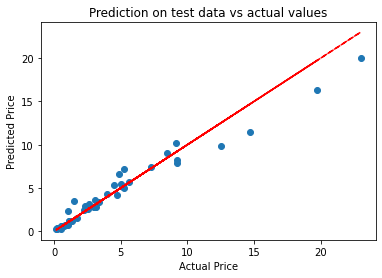

Train CV scores : [0.91282521 0.8024525  0.86782105 0.86421552 0.86795425]
Train CV mean : 0.86


In [102]:
# Training Ridge Regression model 
forest = RandomForestRegressor()
  # Setting the parameters
n_estimators=list(range(500,1200,100)) # seting number of trees in random forest
max_depth=list(range(4,9,4))           # max numbers of leaves in a tree
min_samples_split=list(range(4,9,2))   # min number of samples needed to split an internal node
min_samples_leaf=[1,2,5,7]             # min number of samples needed to be at a leaf node.
max_features=['auto','sqrt']           # names of fearures

  # Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

forest_rs = RandomizedSearchCV(estimator = forest, param_distributions = param_grid)

forest_rs.fit(X_train,Y_train)

#Random Forest model evaluation

  #Prediction on train data
prediction_on_train_data_forest=forest_rs.predict(X_train)
error_score_training_forest=metrics.r2_score(Y_train,prediction_on_train_data_forest)
print("R squared Error for train data:",error_score_training_forest)
r_squared_train.append(round(error_score_training_forest,3))
plt.scatter(Y_train, prediction_on_train_data_forest)
plt.plot(Y_train,Y_train, color='r', ls='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction on train data vs actual values")
plt.show()

  #Prediction on test data
prediction_on_test_data_forest=forest_rs.predict(X_test)
error_score_test_forest=metrics.r2_score(Y_test,prediction_on_test_data_forest)
print("R squared Error for test data:",error_score_test_forest)
r_squared_test.append(round(error_score_test_forest,3))
plt.scatter(Y_test, prediction_on_test_data_forest)
plt.plot(Y_test,Y_test, color='r', ls='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction on test data vs actual values")
plt.show()

  #Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val = cross_val_score(forest_rs ,X ,Y ,cv=kf)
cv_mean = cross_val.mean()
print("Train CV scores :",cross_val)
print("Train CV mean :",round(cv_mean,2))
CV_score.append(round(cv_mean,3))

In [106]:
models = ["Linear Regression","Lasso Regression model","Ridge Regression model","Random Forest"]
results=pd.DataFrame({'Model': models,'R Squared(Train data)': r_squared_train,'R Squared(Test data)': r_squared_test,'CV score mean': CV_score})
display(results)

Model  R Squared(Train data)  R Squared(Test data)  \
0       Linear Regression                  0.890                 0.835   
1  Lasso Regression model                  0.890                 0.835   
2  Ridge Regression model                  0.890                 0.835   
3           Random Forest                  0.982                 0.949   

   CV score mean  
0          0.833  
1          0.809  
2          0.829  
3          0.863